<a href="https://colab.research.google.com/github/todedeyi/satellite-iot-superresolution/blob/main/Satellite_IoT_SuperResolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

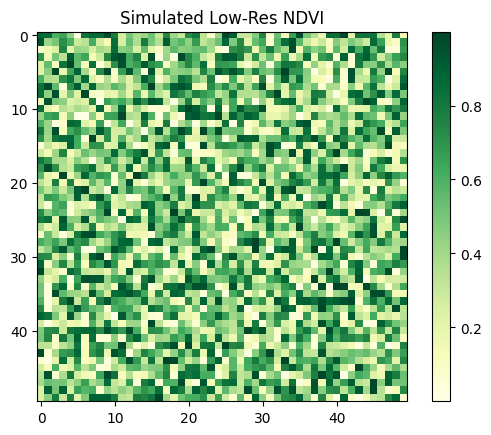

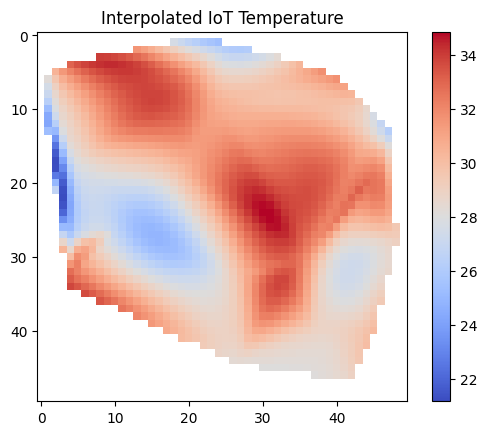

In [6]:
!pip install geopandas rasterio scikit-learn matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from scipy.interpolate import griddata
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D

# Simulate low-res satellite NDVI (50x50)
low_res = np.random.rand(50, 50)
plt.imshow(low_res, cmap='YlGn')
plt.title("Simulated Low-Res NDVI")
plt.colorbar()
plt.show()

# Simulated IoT data points
iot_data = pd.DataFrame({
    'lat': np.random.uniform(0, 1, 25),
    'lon': np.random.uniform(0, 1, 25),
    'temperature': np.random.uniform(25, 35, 25),
    'humidity': np.random.uniform(60, 80, 25)
})
iot_data.head()


# Grid interpolation of temperature
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
points = iot_data[['lon', 'lat']].values
values = iot_data['temperature'].values
grid_temp = griddata(points, values, (grid_x, grid_y), method='cubic')

plt.imshow(grid_temp, cmap='coolwarm')
plt.title("Interpolated IoT Temperature")
plt.colorbar()
plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/up_sampling2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0794
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 0.0782
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0771
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0761
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


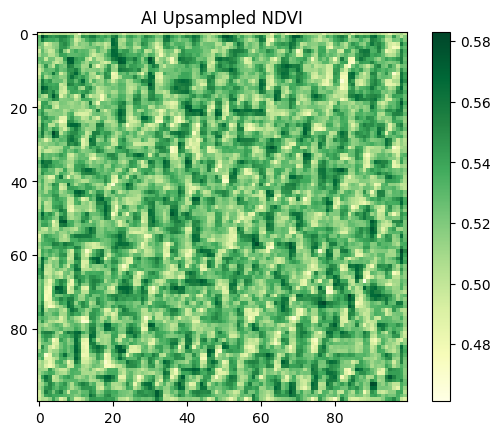

In [7]:
# CNN model to increase resolution
model = Sequential([
    UpSampling2D(size=(2,2), input_shape=(50, 50, 1)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='mse')

# Expand dims to (batch, height, width, channels)
X = np.expand_dims(low_res, axis=(0, -1))
y = np.expand_dims(np.kron(low_res, np.ones((2,2))), axis=(0, -1))  # Fake high-res target

model.fit(X, y, epochs=5)

super_res = model.predict(X)[0, :, :, 0]

plt.imshow(super_res, cmap='YlGn')
plt.title("AI Upsampled NDVI")
plt.colorbar()
plt.show()
